In [2]:
from pandas import read_csv, DataFrame
from factor_analyzer import FactorAnalyzer

project_home = '/Users/catcamacho/Box/SNAP/BABIES/quest_analysis/'
ibq_data = read_csv(project_home + 'ibq_fullsample.csv', index_col=None)
features=ibq_data.iloc[:,1:15]

fa = FactorAnalyzer()
fa.analyze(features,3,rotation='varimax', method='ml', normalize=True)
print(fa.get_factor_variance())

                 Factor1   Factor2   Factor3
SS Loadings     1.969824  1.987460  1.303459
Proportion Var  0.140702  0.141961  0.093104
Cumulative Var  0.140702  0.282663  0.375767


In [3]:
loadings = fa.loadings
loadings = loadings.sort_values('Factor1')
print(loadings)

                          Factor1   Factor2   Factor3
sadness                 -0.089455  0.587655  0.167166
falling_reactivity      -0.007097 -0.614199  0.339792
low_intensity_pleasure   0.048660 -0.175408  0.711478
distress_to_limitations  0.063993  0.725501 -0.131597
fear                     0.071687  0.411146  0.190813
cuddliness               0.086696 -0.361157  0.163918
duration_of_orienting    0.111601 -0.008099  0.247517
activity_level           0.162667  0.399601 -0.007891
perceptual_sensitivity   0.235469  0.014255  0.538114
soothability             0.268053 -0.467861  0.203423
approach                 0.421965  0.000004  0.332568
vocal_reactivity         0.646175  0.133432  0.082473
high_intensity_pleasure  0.736986 -0.027632  0.205631
smiling_laughter         0.798557 -0.104286  0.145934


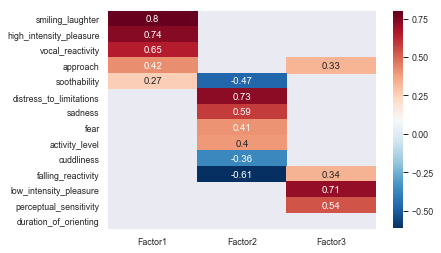

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(context='paper')
mask_upper = fa.loadings
mask_upper = mask_upper[mask_upper>.25]
mask_lower = fa.loadings
mask_lower = mask_lower[mask_lower<-0.25]
mask = mask_upper.radd(mask_lower, fill_value=0)
mask = mask.sort_values(by=['Factor1','Factor2','Factor3'], ascending=False)
sns.heatmap(mask, annot=True, cmap='RdBu_r')
plt.savefig(project_home + 'loadings_labeled.svg')

In [38]:
factor_scores = fa.get_scores(features)
ibq_data = ibq_data.join(factor_scores)
ibq_data.to_csv(project_home + 'ibq_fullsample_withfactors.csv')
ibq_data.head()

,ID,activity_level,distress_to_limitations,fear,duration_of_orienting,smiling_laughter,high_intensity_pleasure,low_intensity_pleasure,soothability,falling_reactivity,...,sadness,approach,vocal_reactivity,SUR,NEG,REG,age,Factor1,Factor2,Factor3
0,2,6.428571,5.857143,2.666667,4.666667,3.857143,5.571429,5.428571,4.571429,4.000000,...,6.333333,5.833333,5.571429,5.265873,4.714286,5.000000,4.829701,-0.447479,2.163225,-0.114471
1,3,6.571429,3.857143,3.333333,4.333333,6.428571,7.000000,6.714286,7.000000,5.166667,...,1.500000,7.000000,6.285714,6.797619,2.880952,6.220238,6.636732,1.684580,-0.408973,0.801066
2,7,3.857143,6.000000,2.833333,3.333333,4.000000,6.285714,4.571429,5.000000,4.000000,...,5.500000,5.833333,4.571429,5.230159,4.583333,4.684524,5.026832,-0.236998,1.613427,-0.362921
3,10,4.714286,4.571429,1.666667,3.500000,4.714286,5.857143,6.571429,4.571429,3.166667,...,3.000000,5.500000,5.857143,5.162698,3.517857,4.660714,6.111050,0.022782,0.948106,-0.438086
4,12,4.428571,4.142857,2.333333,4.166667,5.285714,7.000000,6.285714,6.571429,6.666667,...,3.333333,5.833333,3.000000,5.369048,2.785714,5.797619,6.406746,0.057225,-0.711978,0.812623


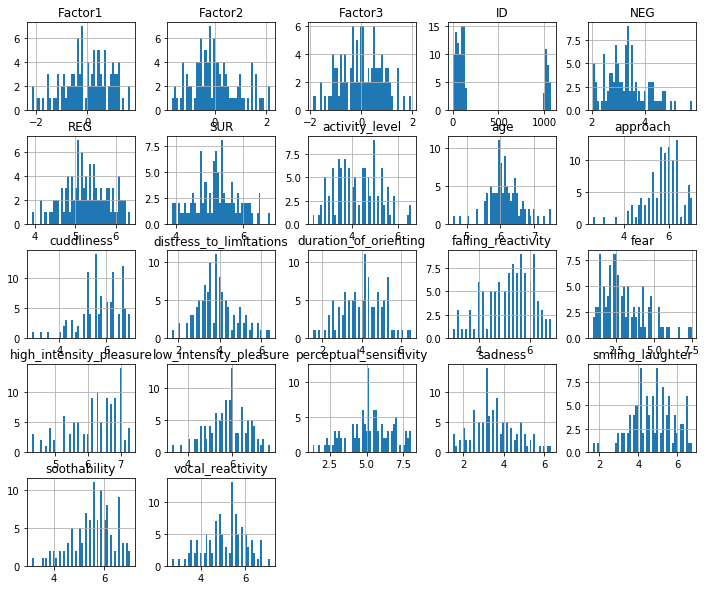

In [43]:
import matplotlib.pyplot as plt

ibq_data.hist(bins=50, figsize=(12,10))
plt.show()

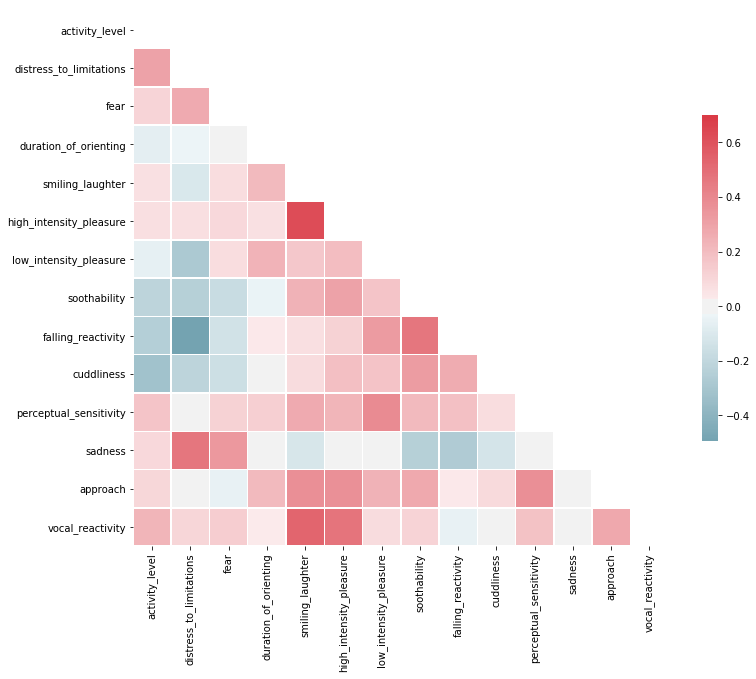

In [44]:
import seaborn as sns
from numpy import zeros_like, triu_indices_from, bool

mask = zeros_like(correlations, dtype=bool)
mask[triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(12,12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.savefig(project_home + 'ibq_corr_matrix.png')

In [1]:
from pandas import read_csv, DataFrame, Series

data = read_csv('/Users/catcamacho/Box/SNAP/BABIES/proc/asl_group_2factor/cluster_betas/combined_clusters_extracted_betas.csv',index_col=None)
data.head()

,Subject,neg_pos_clust19,neg_pos_clust20,neg_pos_clust21,neg_pos_clust22,neg_pos_clust23,neg_pos_clust24,neg_pos_clust25,neg_pos_clust26,neg_pos_clust27,...,reg_neg_clust17,neg,reg,age,mean_distress,mean_SF_distress,mean_R_distress,mean_positive,mean_SF_positive,mean_PR_positive
0,002x,122.479540,116.360928,118.536554,127.168615,114.099125,103.532112,96.531978,125.325693,120.811071,...,83.820344,2.163225,-0.114471,6.143737,31.226000,21.686761,32.113355,7.280186,8.787237,6.275485
1,12,137.173632,115.175983,121.434220,130.194470,111.544883,88.548225,84.677830,116.002292,119.529087,...,74.763036,-0.711978,0.812623,6.373717,37.970975,83.123839,11.383426,36.453340,4.387399,57.830634
2,20,116.163240,100.415688,115.959913,98.686101,91.047295,95.120448,82.544327,111.197483,99.889040,...,90.371882,-1.043528,-1.113127,6.012320,168.518602,220.407325,194.277556,26.040163,1.666685,42.289148
3,21,94.483151,113.284958,90.686374,106.026591,96.483745,87.026044,70.739513,110.222524,106.618852,...,77.205587,-0.779022,0.452646,6.735113,26.672493,53.347784,13.333448,22.549501,3.764037,35.073143
4,23,90.873794,83.378632,81.044206,87.660669,81.868884,70.870799,71.986351,83.443057,75.228783,...,77.896209,-1.232424,-1.090080,6.143737,116.704696,189.101425,84.711444,3.418833,0.000000,5.698054


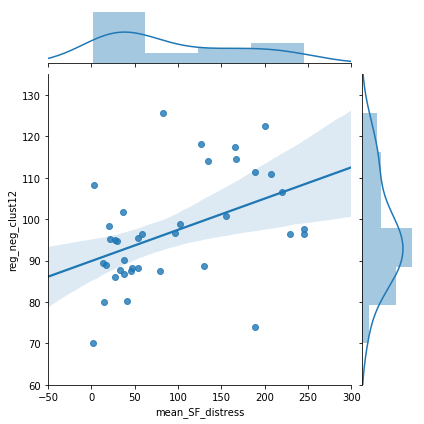

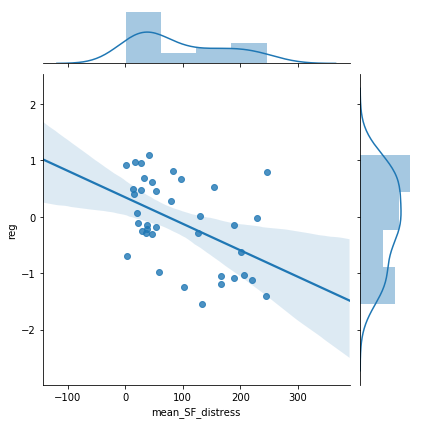

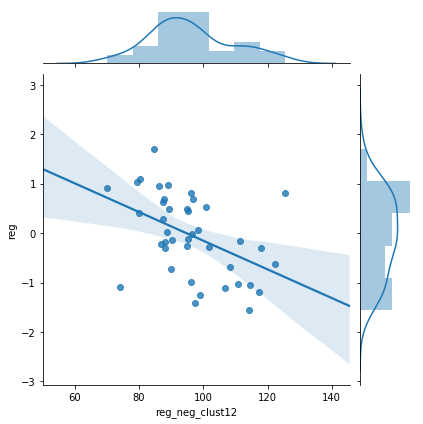

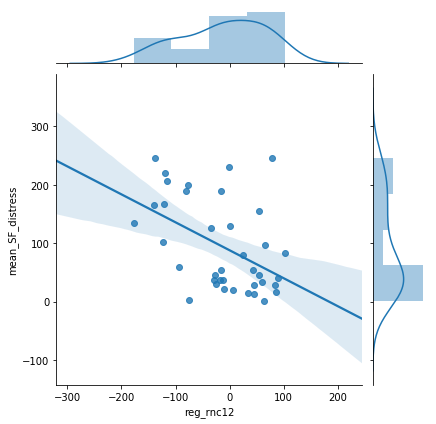

In [10]:
import seaborn as sns

sns.jointplot(x='mean_SF_distress',y='reg_neg_clust12',data=data, 
              kind='reg', xlim=(-50, 300), ylim=(60, 135))

sns.jointplot(x='mean_SF_distress',y='reg',data=data, 
              kind='reg')

sns.jointplot(x='reg_neg_clust12',y='reg',data=data, 
              kind='reg')
data['reg_rnc12'] = data['reg']*data['reg_neg_clust12']
sns.jointplot(x='reg_rnc12',y='mean_SF_distress',data=data, 
              kind='reg')